<a href="https://colab.research.google.com/github/aruniitk/Automation-Scripts/blob/master/Logistic_Regression_Fine_Grained_Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [5]:
import pandas as pd 

# Feature names from the file kddcup.names file to be used as cols heading
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv("/content/gdrive/My Drive/kddcup.data.corrected", header=None, names = col_names)

# df=pd.read_csv('/content/gdrive/My Drive/data/kddcup.data_10_percent_corrected')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
## Data Preperation for training
# ------------------------------
def prepare_data(df):
  '''This function prepares the dataset for training. 
  All categorical data will be encoded using LabelEncoder() of Sklearn. 
  Labels of each sample will be encoded into five categories as follows: -
  
    0 - Normal connection
    1 - dos attack
    2 - probe attack
    3 - r2l attack
    4 - u2r attack
  '''
  # Encoding the categorical label to five categories:
  newlabeldf=df['label'].replace({ 'normal.' : 0, 'neptune.' : 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
                           'ipsweep.' : 2,'nmap.' : 2,'portsweep.' : 2,'satan.' : 2,'mscan.' : 2,'saint.' : 2
                           ,'ftp_write.': 3,'guess_passwd.': 3,'imap.': 3,'multihop.': 3,'phf.': 3,'spy.': 3,'warezclient.': 3,'warezmaster.': 3,'sendmail.': 3,'named.': 3,'snmpgetattack.': 3,'snmpguess.': 3,'xlock.': 3,'xsnoop.': 3,'httptunnel.': 3,
                           'buffer_overflow.': 4,'loadmodule.': 4,'perl.': 4,'rootkit.': 4,'ps.': 4,'sqlattack.': 4,'xterm.': 4})
  df['label'] = newlabeldf.astype('int')
  
  # Encoding categorical data using LabelEncoder()
  le = LabelEncoder()
  df['protocol_type'] = le.fit_transform(df['protocol_type'])
  df['service']= le.fit_transform(df['service'])
  df['flag'] = le.fit_transform(df['flag'])
  
  return df
  

In [0]:
# X = df.iloc[:,:41]
# y = df.iloc[:,-1].astype('int')


In [0]:
df = prepare_data(df)

In [0]:
df_train, df_test = train_test_split(df, stratify=df['label'], test_size=0.25)
#df_train, df_val = train_test_split(df_train, stratify=df_train['label'], test_size=0.3333)
X_train = df_train.iloc[:,:41]# Arun
Y_train = df_train.iloc[:,-1].astype('int') # Arun

X_test = df_test.iloc[:,:41]# Arun
Y_test = df_test.iloc[:,-1].astype('int') # Arun


In [10]:
df['label'].value_counts()

1    3883370
0     972781
2      41102
3       1126
4         52
Name: label, dtype: int64

In [11]:
df_train['label'].value_counts()

1    2912527
0     729586
2      30826
3        845
4         39
Name: label, dtype: int64

## Visualizing the catogaries (normal + four attack types)

In [15]:
from numpy import where
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:41]
X = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].astype('int')

pd.DataFrame(data = X, columns = col_names[:-1]).head()

ValueError: ignored

In [0]:
covar_matrix = PCA(n_components = 41)
covar_matrix.fit(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([26. , 37.9, 46.9, 54.5, 59.2, 63.3, 66.4, 69.3, 72.2, 74.8, 77.4,
       79.9, 82.4, 84.8, 87. , 89.2, 91.2, 93.1, 94.9, 95.9, 96.8, 97.7,
       98.3, 98.8, 99.2, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

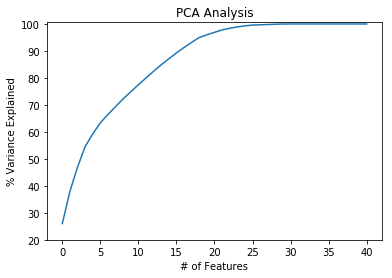

In [0]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(20,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

##Training 

In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=64):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
# train, test = train_test_split(df, test_size=0.2)
# train, val = train_test_split(train, test_size=0.2)
# print(len(train), 'train examples')
# print(len(val), 'validation examples')
# print(len(test), 'test examples')

# batch size is a hyperparameter that defines the number of samples to work
# Adjust the batch_size as per the RAM availability before modeling.
batch_size = 10000

# creating the tf.data dataset
train_ds = df_to_dataset(df_train, batch_size=batch_size)
val_ds = df_to_dataset(df_val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(df_test, shuffle=False, batch_size=batch_size)



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score # Used for cross validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

param_dist_lr = {"max_iter": [10], "C": [0.4, 1], 
#                 "solver":['lbfgs', 'liblinear'], 
                 "solver":['liblinear'], 
 #                "class_weight": ['balanced']
                 } 
rs_ls = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_dist_lr, 
                           n_iter=6, n_jobs=-1, scoring='accuracy',cv=3)  

In [37]:
rs_ls.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=6. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=6, n_jobs=-1,
                   param_distributions={'C': [0.4, 1], 'max_iter': [10],
                                        'solver': ['liblinear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accurac

In [38]:
# Predict the labels of new data # 
Y_pred = rs_ls.predict(X_test)

# Measuring Model Performance
print( "\nAccuracy Score of Logistic Regression is ", accuracy_score(Y_test, Y_pred)*100)
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix from Logistic Regression Method is") 
print(cm)



Accuracy Score of Logistic Regression is  98.20171026156942

Confusion Matrix from Logistic Regression Method is
[[232994  10200      0      1      0]
 [  1252 969591      0      0      0]
 [  3497   6777      1      1      0]
 [   268     13      0      0      0]
 [    12      1      0      0      0]]


In [0]:
# Generating feature layer for keras sequential model.
feature_columns = []
for header in list(df.columns)[:-1]:
  feature_columns.append(feature_column.numeric_column(header))
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [30]:
# Create, compile, and train the model
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(5, activation='softmax'),
  
])

model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.fit(train_ds,
#           validation_data=val_ds,
#           epochs=5,
#           callbacks=[TensorBoardColabCallback(tbc)])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=1,workers=10
          )

KeyboardInterrupt: ignored

In [0]:
# Testing on the heldout dataset from training samples.
loss, accuracy = model.evaluate(test_ds)
print("Accuracy on heldout test dataset: ", accuracy)


123/123 [==============================] - 41s 330ms/step - loss: 3.4025 - acc: 0.9953
Accuracy on heldout test dataset:  0.9952842


In [0]:
y_pred=model.predict(test_ds)

In [0]:
y_true = df_test.iloc[:,-1].astype('int')

In [0]:
type(y_pred.shape)

numpy.ndarray

In [0]:
type(y_true.shape)

pandas.core.series.Series

In [0]:
y_true


459268     1
4418581    1
3786194    1
3387541    1
3429049    0
          ..
213912     0
1126469    1
2173557    1
3478792    1
2010938    1
Name: label, Length: 1224608, dtype: int64

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_true,y_pred)

ValueError: ignored

### Using SGD

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

In [0]:
trainX = df_train.iloc[:,:41]
trainy = df_train.iloc[:,-1].astype('int')
testX = df_val.iloc[:,:41]
testy = df_val.iloc[:,-1].astype('int')

In [0]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(np.asarray(trainX), np.asarray(trainy), validation_data=(np.asarray(testX), np.asarray(testy)), epochs=100, verbose=0)

KeyboardInterrupt: ignored